# P 556 Final Project

### By Manisha Chandran and Vishwas Desai

## Merging the datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### "data_without_actors.csv" is the dataset we collected from IMDb which has 4 attributes namely  imdbId, budget, box office, director, actors 

In [4]:
df = pd.read_csv('../input/aml-dataset/data_without_actors.csv')

# Movielens Dataset
links = pd.read_csv('../input/movielens/links.csv')
ratings = pd.read_csv('../input/movielens/ratings.csv')
movies = pd.read_csv('../input/movielens1/movies.csv')

In [31]:
df.head(10)

,imdbId,budget,box_office,director,actors
0,114709,30000000.0,373554033.0,John Lasseter,Tom Hanks;Tim Allen;Don Rickles;Jim Varney;Wal...
1,113497,50000000.0,262797249.0,Joe Johnston,Robin Williams;Jonathan Hyde;Kirsten Dunst;Bra...
2,113228,25000000.0,NaN,Howard Deutch,Walter Matthau;Jack Lemmon;Sophia Loren;Ann-Ma...
3,114885,16000000.0,81452156.0,Forest Whitaker,Whitney Houston;Angela Bassett;Loretta Devine;...
4,113041,30000000.0,NaN,Charles Shyer,Steve Martin;Diane Keaton;Martin Short;Kimberl...
5,113277,60000000.0,120000000.0,Michael Mann,Al Pacino;Robert De Niro;Val Kilmer;Jon Voight...
6,114319,58000000.0,87313761.0,Sydney Pollack,Harrison Ford;Julia Ormond;Greg Kinnear;Nancy ...
7,112302,NaN,NaN,Peter Hewitt,Jonathan Taylor Thomas;Brad Renfro;Eric Schwei...
8,114576,35000000.0,44000000.0,Peter Hyams,Jean-Claude Van Damme;Powers Boothe;Raymond J....
9,113189,60000000.0,352194034.0,Martin Campbell,Pierce Brosnan;Sean Bean;Izabella Scorupco;Fam...


## From Movielens Dataset

### links.csv, ratings.csv, movies.csv

[Movielens](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)

In [6]:
links = links.drop('tmdbId', 1)
links.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [7]:
ratings =ratings.drop('timestamp', 1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Finidng the average rating for every movie in the dataset for ease of use

In [9]:
avgRatings = ratings.groupby('movieId').agg({'rating': [np.mean]})
avgRatings = avgRatings.rename(columns = {"mean":"Average Rating"})
avgRatings.head()

,rating
,Average Rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [10]:
# Checking for duplicates
#avgRatings.duplicated()

In [32]:
# avgRatings.nunique()

### Merging links with avgRatings to create a new dataset

In [12]:
df1 = pd.merge(links, avgRatings,
                   on='movieId', 
                   how='outer')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


### Merging df1 with movies to create our final dataset

In [13]:
df2 = pd.merge(df1, movies, on= 'movieId', how ='outer')
df2.head()

,movieId,imdbId,"(rating, Average Rating)",title,genres
0,1,114709,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,3.071429,Father of the Bride Part II (1995),Comedy


In [14]:
data = pd.merge(df2, df, on='imdbId', how='outer')
#data = data.drop('tmdbId', 1)
data.head(10)

,movieId,imdbId,"(rating, Average Rating)",title,genres,budget,box_office,director,actors
0,1,114709,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30000000.0,373554033.0,John Lasseter,Tom Hanks;Tim Allen;Don Rickles;Jim Varney;Wal...
1,2,113497,3.431818,Jumanji (1995),Adventure|Children|Fantasy,50000000.0,262797249.0,Joe Johnston,Robin Williams;Jonathan Hyde;Kirsten Dunst;Bra...
2,3,113228,3.259615,Grumpier Old Men (1995),Comedy|Romance,25000000.0,NaN,Howard Deutch,Walter Matthau;Jack Lemmon;Sophia Loren;Ann-Ma...
3,4,114885,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance,16000000.0,81452156.0,Forest Whitaker,Whitney Houston;Angela Bassett;Loretta Devine;...
4,5,113041,3.071429,Father of the Bride Part II (1995),Comedy,30000000.0,NaN,Charles Shyer,Steve Martin;Diane Keaton;Martin Short;Kimberl...
5,6,113277,3.946078,Heat (1995),Action|Crime|Thriller,60000000.0,120000000.0,Michael Mann,Al Pacino;Robert De Niro;Val Kilmer;Jon Voight...
6,7,114319,3.185185,Sabrina (1995),Comedy|Romance,58000000.0,87313761.0,Sydney Pollack,Harrison Ford;Julia Ormond;Greg Kinnear;Nancy ...
7,8,112302,2.875000,Tom and Huck (1995),Adventure|Children,NaN,NaN,Peter Hewitt,Jonathan Taylor Thomas;Brad Renfro;Eric Schwei...
8,9,114576,3.125000,Sudden Death (1995),Action,35000000.0,44000000.0,Peter Hyams,Jean-Claude Van Damme;Powers Boothe;Raymond J....
9,10,113189,3.496212,GoldenEye (1995),Action|Adventure|Thriller,60000000.0,352194034.0,Martin Campbell,Pierce Brosnan;Sean Bean;Izabella Scorupco;Fam...


In [15]:
data.describe()

,movieId,imdbId,"(rating, Average Rating)",budget,box_office
count,9742.000000,9.742000e+03,9724.000000,6.339000e+03,3.063000e+03
mean,42200.353623,6.771839e+05,3.262448,4.523667e+07,3.507420e+13
std,52160.494854,1.107228e+06,0.869874,4.655850e+08,1.495635e+14
min,1.000000,4.170000e+02,0.500000,2.000000e+01,1.500000e+01
25%,3248.250000,9.518075e+04,2.800000,4.600000e+06,5.169008e+07
50%,7300.000000,1.672605e+05,3.416667,1.500000e+07,1.270927e+08
75%,76232.000000,8.055685e+05,3.911765,3.800000e+07,4.412962e+08
max,193609.000000,8.391976e+06,5.000000,3.000000e+10,2.787965e+15


### Checking for Null values in the dataset

In [16]:
 data.isnull().any()

movieId                     False
imdbId                      False
(rating, Average Rating)     True
title                       False
genres                      False
budget                       True
box_office                   True
director                     True
actors                       True
dtype: bool

In [17]:
data.dropna(axis=0,inplace=True)
data.shape

(2818, 9)

In [33]:
data.isnull().any()

movieId                     False
imdbId                      False
(rating, Average Rating)    False
title                       False
genres                      False
budget                      False
box_office                  False
director                    False
actors                      False
dtype: bool

From above, we can note that there are no NaN values in our dataset

### Displaying first few rows of our dataset

In [19]:
data.head(10)

,movieId,imdbId,"(rating, Average Rating)",title,genres,budget,box_office,director,actors
0,1,114709,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30000000.0,373554033.0,John Lasseter,Tom Hanks;Tim Allen;Don Rickles;Jim Varney;Wal...
1,2,113497,3.431818,Jumanji (1995),Adventure|Children|Fantasy,50000000.0,262797249.0,Joe Johnston,Robin Williams;Jonathan Hyde;Kirsten Dunst;Bra...
3,4,114885,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance,16000000.0,81452156.0,Forest Whitaker,Whitney Houston;Angela Bassett;Loretta Devine;...
5,6,113277,3.946078,Heat (1995),Action|Crime|Thriller,60000000.0,120000000.0,Michael Mann,Al Pacino;Robert De Niro;Val Kilmer;Jon Voight...
6,7,114319,3.185185,Sabrina (1995),Comedy|Romance,58000000.0,87313761.0,Sydney Pollack,Harrison Ford;Julia Ormond;Greg Kinnear;Nancy ...
8,9,114576,3.125000,Sudden Death (1995),Action,35000000.0,44000000.0,Peter Hyams,Jean-Claude Van Damme;Powers Boothe;Raymond J....
9,10,113189,3.496212,GoldenEye (1995),Action|Adventure|Thriller,60000000.0,352194034.0,Martin Campbell,Pierce Brosnan;Sean Bean;Izabella Scorupco;Fam...
10,11,112346,3.671429,"American President, The (1995)",Comedy|Drama|Romance,62000000.0,47800000.0,Rob Reiner,Michael Douglas;Annette Bening;Martin Sheen;Mi...
11,12,112896,2.421053,Dracula: Dead and Loving It (1995),Comedy|Horror,30000000.0,682514.0,Mel Brooks,Leslie Nielsen;Peter MacNicol;Steven Weber;Amy...
16,17,114388,3.776119,Sense and Sensibility (1995),Drama|Romance,16000000.0,135000000.0,Ang Lee,James Fleet;Tom Wilkinson;Harriet Walter;Kate ...


In [20]:
data.describe()

,movieId,imdbId,"(rating, Average Rating)",budget,box_office
count,2818.000000,2.818000e+03,2818.000000,2.818000e+03,2.818000e+03
mean,49166.797374,8.383462e+05,3.198193,7.620826e+07,3.781773e+13
std,52199.666502,1.059145e+06,0.705278,6.752133e+08,1.555725e+14
min,1.000000,4.972000e+03,0.500000,7.000000e+03,1.500000e+01
25%,3616.250000,1.205095e+05,2.833333,1.500000e+07,6.208533e+07
50%,33815.500000,3.722100e+05,3.300000,3.500000e+07,1.369095e+08
75%,88157.250000,1.225769e+06,3.705882,6.900000e+07,4.674499e+08
max,190183.000000,7.349662e+06,5.000000,3.000000e+10,2.787965e+15


### Finding Correlation with the target variable

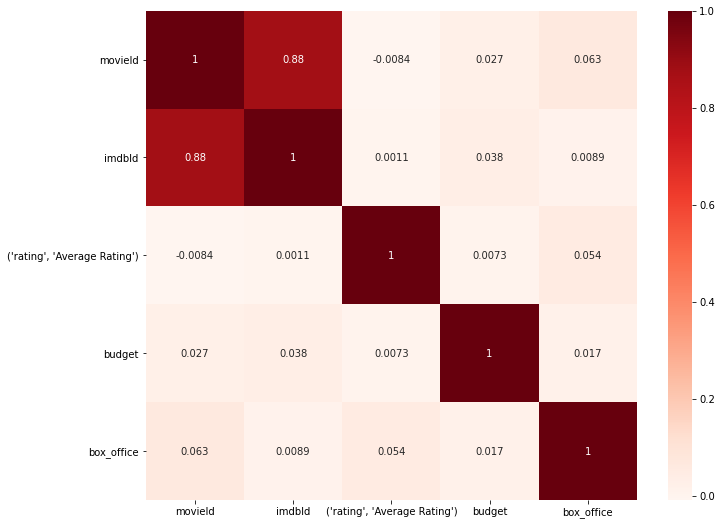

In [21]:
plt.figure(figsize=(11,9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### From the corr matrix we can see that box office and budget have a non linear correaltion with our target variable but we intend to train separate models with and without these attributes and compare our results

### The average rating correlates more strongly with budget than with box office numbers, as the former is directly related to the amount spent on a film's promotion, which increases the reach the movie has resulting in more and more user people watching the movie.

[Reference](https://asistdl.onlinelibrary.wiley.com/doi/full/10.1002/asi.23213)

In [27]:
data.to_csv("AMLdataset.csv")